In [72]:
import pandas as pd 
pd.options.display.float_format = '{:.5f}'.format

### 1. 데이터 읽기

- data 파일 안에 있는 day1.csv파일 읽기
- 읽은 뒤 df에 저장하기

### 2. 전체 컬럼 출력하기 
- 출력한 뒤 5번째 컬럼명만 출력하기
- 이후 컬럼의 갯수를 확인하기

### 3. iloc을 활용해 전체행과 3번째 열 출력하기

- 이후 10번째 행에 있는 6번째 열의 값을 출력하기

### 3-2 loc를 활용해 전체 행과 3번째 열('회계년도') 출력하기
- 이후 10번째 행에 있는 6번째 열('결산년도')의 값 출력하기

### 4. 결측치 확인하기. 모든 열이 가진 결측치 숫자 파악

### 5. '거래소코드' 열의 값들을 출력하기

- 만약 거래소코드의 값이 6자리가 아닌 경우 0으로 채우기 

### 6. 거래소코드의 유일값 갯수를 출력하기 
- 이후 유일값을 모두 출력하기
- 출력한 유일값들을 for문을 사용해 출력하기 

### 7. df의 회계년도 열을 datetime형식으로 변환하기
- 회계년도의 연도값을 year이라는 새로운 열에 저장하기
- year값이 22년이면서, 영업손익 열이 적자인 회사명 출력

### 8. df의 컬럼중 '영업'이라는 단어를 포함한 열을 df2로 저장하기

- df.columns는 리스트이므로 []로 추출
- 이후 for문, loc나 iloc 사용해 합치기

### 복습 끝

### 1. 시가총액 데이터 yf로 가져오기

In [82]:
import yfinance as yf

#yf.Ticker('005930.KS').info['marketCap']
#이거 인포를 찍어보면 걍 회사에대한 정보 다 나오고 있는 것 
#이중 시가총액이 있지만, 가장 최근날짜의 시가총액밖에 나오지 않을것임
# TS에서 발행주식의 총수 가져와서 계산은 가능할듯 
# TS에서 발행주식 총수 가져올경우 본주, 우선주 때문에 행처리도 거지같을것임 

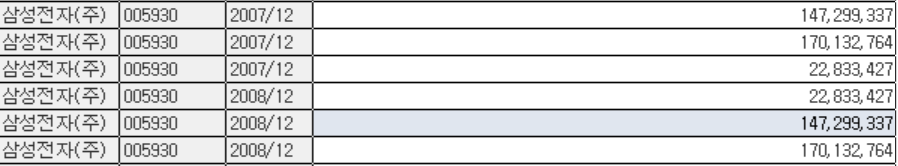

In [83]:
yf.Ticker('005930.KS').history(start='2021-01-02', end='2021-01-06')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00+09:00,76045.04763,79237.06197,75293.98543,77922.70312,38655276,0.00000,0.00000
2021-01-05 00:00:00+09:00,76608.33701,78767.64062,76608.33701,78767.64062,35335669,0.00000,0.00000


In [84]:
yf.Ticker('005930.KS').info['sharesOutstanding']

5969780224

In [85]:
df['거래소코드'][0]+'.KS'

'000020.KS'

In [1]:
import yfinance as yf
from pykrx import stock
# 이유는 모르겠으나 yf불러와져 있어야 pykrx의 시가총액 데이터 가져와지는것으로 보임 
stock.get_market_cap('2021-01-01','2021-01-05',"005930")

,시가총액,거래량,거래대금,상장주식수
날짜,,,,
2021-01-04,495491951650000,38655276,3185356823460,5969782550
2021-01-05,500864755945000,35335669,2915618322800,5969782550


In [ ]:
#위 코드 안될경우
stock.get_market_cap("20100625") 

In [87]:
# 이게 걍 goat니까 이거가 나오게 해결하는게?
stock.get_market_cap_by_date('2021-01-01','2021-01-05', "005930")

,시가총액,거래량,거래대금,상장주식수
날짜,,,,
2021-01-04,495491951650000,38655276,3185356823460,5969782550
2021-01-05,500864755945000,35335669,2915618322800,5969782550


### 2. 거래소코드별 데이터 개수 구하기


- 이때, 거래소코드별로 데이터 개수가 5개 미만인 경우만 출력하기 (map사용)

## 3. pbr 구하기
- '자산,자본,부채,매출.csv'를 새로운 df로 파일 읽기

#### 3-1 개별, 연결 합치기

- 연결이 붙은 열을 추출해 개별 df로 만들기 (filtered_df)
- 기존의 df에서 연결이 붙은 열을 드랍하기
- 두 데이터프레임의 열 이름을 깔끔하게 정리하기 (for문 사용, 제거할 내용을 리스트화하기)
- 기존 df와 filtered_df를 합치기. 이 때, filtered_df가 연결값이므로 우선시 되어야함

#### 3-2 시가총액 구하기 
- df의 거래소코드에 제로패딩하기 
- '회계년도 말일'열을 생성하기 (이때 df회계년도의 값에서 일 데이터만 31로 바뀐 값 넣기)
- df.head()를 df_example로 저장하기

### 3-3 만들어낸 회계년도 말일을 통해 df_example의 연말 시가총액 구하기

- 저장할 빈 리스트를 우선 만들어야 할것
- 시가총액 코드를 보면서 내가 구한 걸 넣어야함. 
- 이때, 최종값 1개만 넣으면 되므로 특정함수를 사용해야할것임 